Step memodelkan data dengan Machine Learning :

- Import library
- Siapkan Dataset
  - Data Cleansing (handle missing value, outlier, dll)
  - Feature Engineering (encoding, scaling, dll.)
- Deklarasi model
- Training Model
  - Model Optimization (tuning parameter, tweaking, dll.) (todo)
- Gunakan Model
  - Evaluasi
  - Inference
  - Save Model
  - Deployment

In [ ]:
# import library
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle
import matplotlib.pyplot as plt

In [ ]:
# siapkan data
df = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# pisahkan antara fitur dan label
X = df.drop("Outcome", axis=1)
y = df['Outcome']

# split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)

In [ ]:
# deklarasikan scaler
scaler = StandardScaler()

# scale data training
X_train_scaled = scaler.fit_transform(X_train)

# scale data test
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Deklarasikan model

knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# training model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# prediksi data test
y_pred = knn.predict(X_test_scaled)

# evaluasi model
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        84
           1       0.54      0.62      0.58        32

    accuracy                           0.75       116
   macro avg       0.69      0.71      0.70       116
weighted avg       0.76      0.75      0.76       116



In [ ]:
# save model
with open("model_knn.pkl", "wb") as model_file:
  pickle.dump(knn, model_file)

### Choose K

In [ ]:
# loop k dan train masing2 k
max_k = 30
training = []
testing = []
for k in range(1, max_k+1):
  # deklarasi
  knn_loop = KNeighborsClassifier(n_neighbors=k)

  # training
  knn_loop.fit(X_train_scaled, y_train)

  # evaluasi training
  score_training = knn_loop.score(X_train_scaled, y_train)
  training.append(score_training)
  
  # evaluasi testing
  score_testing = knn_loop.score(X_test_scaled, y_test)
  testing.append(score_testing)

In [ ]:
metrics = pd.DataFrame({'training': training, 'testing':testing})

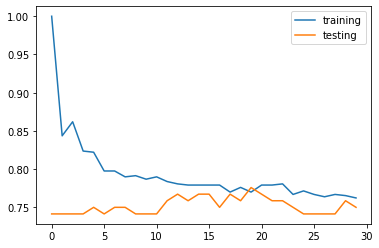

In [ ]:
metrics.plot()

In [ ]:
metrics[metrics['testing'] == metrics['testing'].max()]

,training,testing
19,0.769939,0.775862


# Naive Bayes

In [ ]:
# import library
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import pickle
import matplotlib.pyplot as plt

In [ ]:
# siapkan data
df = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# pisahkan antara fitur dan label
X = df.drop("Outcome", axis=1)
y = df['Outcome']

# split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)

In [ ]:
# deklarasikan scaler
scaler = StandardScaler()

# scale data training
X_train_scaled = scaler.fit_transform(X_train)

# scale data test
X_test_scaled = scaler.transform(X_test)

In [ ]:
nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82        79
           1       0.61      0.59      0.60        37

    accuracy                           0.75       116
   macro avg       0.71      0.71      0.71       116
weighted avg       0.75      0.75      0.75       116



In [ ]:
nb.predict(X_test)[:5]

array([0, 0, 1, 0, 0])

In [ ]:
nb.predict_proba(X_test)[:5]

array([[0.67797532, 0.32202468],
       [0.98392962, 0.01607038],
       [0.28779832, 0.71220168],
       [0.89104509, 0.10895491],
       [0.63364765, 0.36635235]])

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_pred, y_pred_proba)

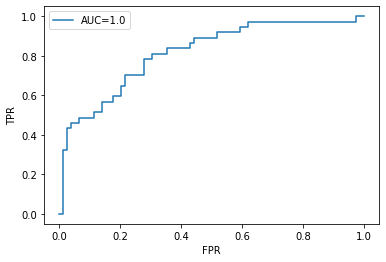

In [ ]:
plt.plot(fpr, tpr, label=f"AUC={auc}")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()